In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation,Conv2D, MaxPool2D
from keras import backend as K

In [5]:
p=open("trainX.pickle",'rb')
x_train=pickle.load(p)

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
p=open("trainY.pickle","rb")
y_train=pickle.load(p)

In [8]:
y_train.shape

(60000,)

In [9]:
np.unique(y_train)  #there are 10 total classes in the dataset

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
p=open("testX.pickle",'rb')
x_test=pickle.load(p)

## Visualising  

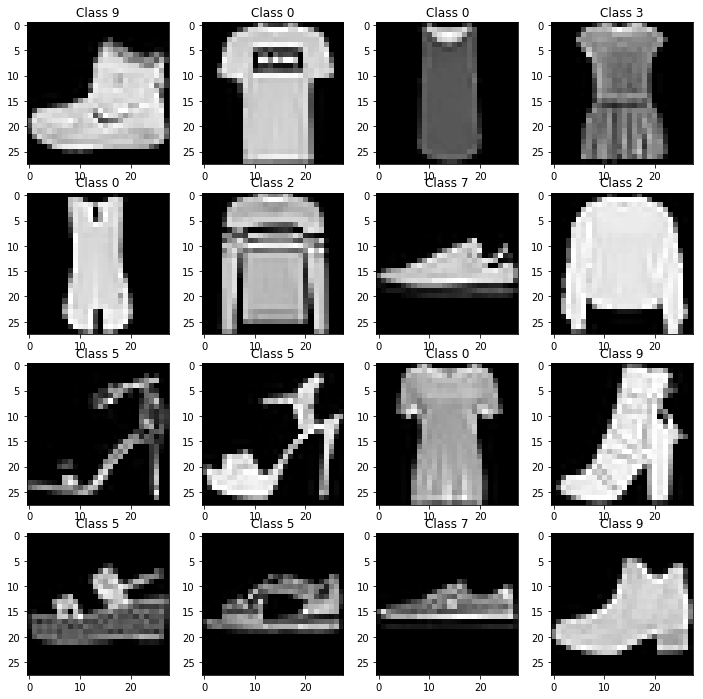

In [11]:
plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.title('Class {}'.format(y_train[i]))

## Preprocessing 

In [12]:
np.unique(y_train,return_counts=True) #checking the number of images in each class

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

### There are 6000 images of each class thus : a balanced dataset 

## Normalization

In [13]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
#x=x-0/255-0

## One Hot Encoding for the labels

In [14]:
from keras.utils import to_categorical

In [15]:
y_train = to_categorical(y_train, num_classes=10)

In [16]:
y_train.shape

(60000, 10)

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Reshaping to feed 

In [18]:
x_train=x_train.reshape(60000,784)

## Splitting the dataset 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x_train,y_train,test_size=0.1,random_state=1)

## Applying vanilla ANN on the dataset 

In [66]:
model = Sequential()
model.add(Dense(500, input_dim=784), )
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(),
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_10 (Activation)   (None, 500)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 300)               150300    
_________________________________________________________________
activation_11 (Activation)   (None, 300)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                3010      
__________

In [67]:
batch_size = 120
num_classes = 10
epochs = 100

In [68]:
model.fit(xtrain, ytrain,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(xtest, ytest))

score = model.evaluate(xtest, ytest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 13s 249us/step - loss: 0.9531 - acc: 0.6438 - val_loss: 0.6937 - val_acc: 0.7520
Epoch 2/100
54000/54000 [==============================] - 13s 243us/step - loss: 0.6993 - acc: 0.7413 - val_loss: 0.6289 - val_acc: 0.7635
Epoch 3/100
54000/54000 [==============================] - 13s 235us/step - loss: 0.6481 - acc: 0.7586 - val_loss: 0.5975 - val_acc: 0.7772
Epoch 4/100
54000/54000 [==============================] - 12s 228us/step - loss: 0.6133 - acc: 0.7742 - val_loss: 0.5762 - val_acc: 0.7857
Epoch 5/100
54000/54000 [==============================] - 12s 227us/step - loss: 0.5922 - acc: 0.7835 - val_loss: 0.5593 - val_acc: 0.7930
Epoch 6/100
54000/54000 [==============================] - 12s 230us/step - loss: 0.5756 - acc: 0.7882 - val_loss: 0.5446 - val_acc: 0.7973
Epoch 7/100
54000/54000 [==============================] - 12s 224us/step - loss: 0.5586 - acc: 0.7965 - val_lo

## Trying Convolution Neural Network 

In [21]:
x_train=x_train.reshape(60000,28,28,1)

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(x_train,y_train,test_size=0.1,random_state=1)

In [23]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.35))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(units = 10, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)          0         
__________

In [24]:
rmsprop = keras.optimizers.RMSprop()
model.compile(
    optimizer = rmsprop,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)


model_CNN = model.fit(xtrain, ytrain, batch_size = 256, epochs = 80, 
          validation_data = (xtest,ytest), verbose = 1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/80
54000/54000 [==============================] - 170s 3ms/step - loss: 0.7047 - acc: 0.7411 - val_loss: 0.4113 - val_acc: 0.8510
Epoch 2/80
54000/54000 [==============================] - 172s 3ms/step - loss: 0.4146 - acc: 0.8464 - val_loss: 0.3274 - val_acc: 0.8753
Epoch 3/80
54000/54000 [==============================] - 172s 3ms/step - loss: 0.3487 - acc: 0.8710 - val_loss: 0.2894 - val_acc: 0.8942
Epoch 4/80
54000/54000 [==============================] - 172s 3ms/step - loss: 0.3156 - acc: 0.8836 - val_loss: 0.2845 - val_acc: 0.8963
Epoch 5/80
54000/54000 [==============================] - 174s 3ms/step - loss: 0.2902 - acc: 0.8933 - val_loss: 0.2637 - val_acc: 0.9072
Epoch 6/80
54000/54000 [==============================] - 173s 3ms/step - loss: 0.2760 - acc: 0.9001 - val_loss: 0.2404 - val_acc: 0.9157
Epoch 7/80
54000/54000 [==============================] - 172s 3ms/step - loss: 0.2617 - acc: 0.9041 - val_loss: 0.2421 - v

54000/54000 [==============================] - 189s 4ms/step - loss: 0.1564 - acc: 0.9446 - val_loss: 0.1919 - val_acc: 0.9357
Epoch 60/80
54000/54000 [==============================] - 175s 3ms/step - loss: 0.1550 - acc: 0.9438 - val_loss: 0.1965 - val_acc: 0.9378
Epoch 61/80
54000/54000 [==============================] - 175s 3ms/step - loss: 0.1539 - acc: 0.9449 - val_loss: 0.1898 - val_acc: 0.9392
Epoch 62/80
54000/54000 [==============================] - 182s 3ms/step - loss: 0.1580 - acc: 0.9447 - val_loss: 0.1945 - val_acc: 0.9367
Epoch 63/80
54000/54000 [==============================] - 173s 3ms/step - loss: 0.1588 - acc: 0.9430 - val_loss: 0.2044 - val_acc: 0.9313
Epoch 64/80
54000/54000 [==============================] - 173s 3ms/step - loss: 0.1543 - acc: 0.9451 - val_loss: 0.2006 - val_acc: 0.9333
Epoch 65/80
54000/54000 [==============================] - 175s 3ms/step - loss: 0.1556 - acc: 0.9457 - val_loss: 0.1939 - val_acc: 0.9347
Epoch 66/80
54000/54000 [==============

In [26]:
score = model.evaluate(xtest, ytest)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

6000/6000 [==============================] - 5s 911us/step
Loss: 0.1954
Accuracy: 0.9363


## The accuracy on validation data comes out to be 93.63% 

# Predict the x_test  

In [29]:
x_test=x_test.reshape(10000,28,28,1)

In [30]:
y_pred=model.predict(x_test)

In [31]:
y_pred

array([[1.30892875e-11, 6.99491395e-14, 4.93984031e-13, ...,
        2.98654271e-07, 1.24447447e-12, 9.99998093e-01],
       [5.07388795e-05, 2.92617016e-12, 9.99811828e-01, ...,
        4.53827189e-13, 7.82955425e-08, 5.31864483e-13],
       [7.07573357e-18, 1.00000000e+00, 4.04346025e-18, ...,
        6.61764801e-30, 3.34961361e-19, 7.25577207e-28],
       ...,
       [2.22626212e-14, 4.91631653e-23, 5.30830678e-16, ...,
        6.83418897e-19, 1.00000000e+00, 3.58550618e-18],
       [4.10110986e-17, 1.00000000e+00, 2.11189095e-18, ...,
        8.34887468e-24, 1.09075499e-19, 1.79762704e-23],
       [7.03403930e-05, 5.25099608e-09, 1.63380506e-07, ...,
        4.81922477e-02, 1.12948054e-03, 1.27876794e-03]], dtype=float32)

In [33]:
y_pred.shape

(10000, 10)

In [34]:
y_pred_classes = np.argmax(y_pred,axis = 1) 

In [35]:
y_pred_classes

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [36]:
pickle_out = open("predictions.pickle","wb")
pickle.dump(y_pred_classes, pickle_out)